Import Dependencies

In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf
import seaborn as sns

<b>Data Cleaning</b>

In [2]:
pd.options.display.max_colwidth=300

In [3]:
surveyDF=pd.read_csv("survey_results_public.csv")
surveyDF

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges)",NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);On the job training;Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Automated testing;Observability tools,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification",Technical documentation;Blogs;Written Tutorials;Stack Overflow;Video-based Online Courses;How-to videos,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);Online Courses or Certification",Technical documentation;Programming Games;Stack Overflow;Online books;Video-based Online Courses;How-to videos;Written-based Online Courses;Coding sessions (live or recorded);Certification videos,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;O

In [4]:
surveyDF.drop(['MainBranch','ResponseId','LearnCode','LearnCodeOnline','LearnCodeCoursesCert','OrgSize','VersionControlSystem','SurveyEase',
               'SurveyLength','TBranch','ICorPM','Knowledge_1','Knowledge_1','Knowledge_2','Knowledge_3','Knowledge_4','Knowledge_5',
               'Knowledge_6','Knowledge_7','CodingActivities','YearsCode','PurchaseInfluence','BuyNewTool','VersionControlSystem',
               'VCInteraction','VCHostingPersonal use','VCHostingProfessional use','OfficeStackAsyncWantToWorkWith',
               'OfficeStackSyncHaveWorkedWith','Blockchain','SOAccount','SOPartFreq','Frequency_1','Frequency_2',
               'Frequency_3','TimeSearching','TimeAnswering','TrueFalse_1','TrueFalse_2','TrueFalse_3','ConvertedCompYearly',
               'Accessibility','NEWSOSites','SOVisitFreq','SOComm','Onboarding','OfficeStackSyncWantToWorkWith','LanguageWantToWorkWith',
               'WebframeWantToWorkWith','DatabaseWantToWorkWith','NEWCollabToolsWantToWorkWith','PlatformWantToWorkWith',
               'MiscTechWantToWorkWith','ToolsTechWantToWorkWith','Age','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith',
               'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use',
               'OfficeStackAsyncHaveWorkedWith', 'ProfessionalTech'],
              axis=1,inplace=True)
surveyDF.head(10)

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",Fully remote,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN
2,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,Man,No,Bisexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",NaN
3,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,NaN
4,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test",United States of America,USD\tUnited States dollar,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN
5,"Student, full-time",NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,Germany,NaN,NaN,NaN,C++;Lua,"Or, in your own words:","Or, in your own words:",Prefer to self-describe:,"Or, in your own words:","Or, in your own words:",NaN
6,"Student, part-time",NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,India,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,Man,No,NaN,Indian,None of the above,NaN
7,"Not employed, but looking for work",NaN,Some college/university study without earning a degree,NaN,"Developer, full-stack;Student",India,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;SQL,Man,No,Straight / Heterosexual,Indian,None of the above,NaN
8,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",Netherlands,EUR European Euro,46000.0,Yearly,NaN,Woman,No,Prefer to self-describe:,European,"Or, in your own words:",6.0
9,"Independent contractor, freelancer, or self-employed",Fully remote,Some college/university study without earning a degree,30,"Developer, desktop or enterprise applications;Developer, mobile;Educator",Croatia,HRK\tCroatian kuna,NaN,NaN,Delphi;Java;Swift,Woman,No,Straight / Heterosexual,White;European,None of the above,NaN


In [5]:
surveyDF.dropna(how=("any"),inplace=True)
surveyDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
11,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
12,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
14,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
21,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
22,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73254,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
73258,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
73259,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
73263,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [6]:
newDF=surveyDF.reset_index(drop=True)
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25308,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
25309,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
25310,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
25311,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [7]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25313 entries, 0 to 25312
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employment              25313 non-null  object 
 1   RemoteWork              25313 non-null  object 
 2   EdLevel                 25313 non-null  object 
 3   YearsCodePro            25313 non-null  object 
 4   DevType                 25313 non-null  object 
 5   Country                 25313 non-null  object 
 6   Currency                25313 non-null  object 
 7   CompTotal               25313 non-null  float64
 8   CompFreq                25313 non-null  object 
 9   LanguageHaveWorkedWith  25313 non-null  object 
 10  Gender                  25313 non-null  object 
 11  Trans                   25313 non-null  object 
 12  Sexuality               25313 non-null  object 
 13  Ethnicity               25313 non-null  object 
 14  MentalHealth            25313 non-null

In [8]:
newDF["WorkExp"].astype("float")

0        14.0
1         5.0
2         5.0
3         4.0
4        23.0
         ... 
25308    16.0
25309     1.0
25310     2.0
25311     5.0
25312     6.0
Name: WorkExp, Length: 25313, dtype: float64

In [9]:
newDF["YearsCodePro"]=newDF["YearsCodePro"].str.replace("Less than 1 year","1")
newDF

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
0,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,United States of America,USD\tUnited States dollar,194400.0,Yearly,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",14.0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevOps specialist",United States of America,USD\tUnited States dollar,110000.0,Yearly,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25308,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist;Data or business analyst;Product manager,United States of America,USD\tUnited States dollar,115000.0,Yearly,R,Man,No,Straight / Heterosexual,White,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)",16.0
25309,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Developer, back-end",India,INR\tIndian rupee,3200000.0,Yearly,Go;Java;SQL,Man,No,Straight / Heterosexual,Asian,None of the above,1.0
25310,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,"Developer, back-end",Poland,PLN\tPolish zloty,8000.0,Monthly,Elixir,Man,No,Straight / Heterosexual,White;European,None of the above,2.0
25311,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",Nigeria,USD\tUnited States dollar,60000.0,Yearly,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;TypeScript,Man,No,Straight / Heterosexual,African,None of the above,5.0


In [10]:
newDF = newDF[newDF["YearsCodePro"]!="More than 50 years"]

In [11]:
newDF["YearsCodePro"].astype("float")

0        10.0
1         5.0
2         5.0
3         4.0
4        20.0
         ... 
25308     6.0
25309     1.0
25310     2.0
25311     5.0
25312     5.0
Name: YearsCodePro, Length: 25310, dtype: float64

In [12]:
newDF['Employment'].value_counts()

Employed, full-time                                                                             21559
Employed, full-time;Independent contractor, freelancer, or self-employed                         1987
Independent contractor, freelancer, or self-employed                                             1042
Employed, part-time                                                                               397
Independent contractor, freelancer, or self-employed;Employed, part-time                          124
Employed, full-time;Employed, part-time                                                           106
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time       91
Employed, part-time;Retired                                                                         2
Employed, full-time;Retired                                                                         1
Employed, full-time;Independent contractor, freelancer, or self-employed;Retired  

In [13]:
# keep only 1. Employed, full-time 2. Employed, part-time 3. Independent contractor, freelancer, or self-employed to ensure only 1 source of income is being reported
employment_values = ['Employed, full-time', 'Employed, part-time', 'Independent contractor, freelancer, or self-employed']
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

newDF = filter_rows_by_values(newDF, "Employment", values=employment_values)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD\tUnited States dollar,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR European Euro,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD\tCanadian dollar,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR European Euro,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD\tUnited States dollar,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0


In [14]:
newDF['Employment'].value_counts() # check for changes

Employed, full-time                                     21559
Independent contractor, freelancer, or self-employed     1042
Employed, part-time                                       397
Name: Employment, dtype: int64

In [15]:
newDF['Gender'].value_counts()

Man                                                                                   21215
Woman                                                                                  1139
Non-binary, genderqueer, or gender non-conforming                                       205
Prefer not to say                                                                       198
Man;Non-binary, genderqueer, or gender non-conforming                                    71
Or, in your own words:                                                                   61
Woman;Non-binary, genderqueer, or gender non-conforming                                  52
Man;Or, in your own words:                                                               38
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  6
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming            4
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [16]:
# keep entries with only 1 answer
gender_values=['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
newDF = filter_rows_by_values(newDF, "Gender", values=gender_values)
newDF['Gender'].value_counts() # check for changes

Man                                                  21215
Woman                                                 1139
Non-binary, genderqueer, or gender non-conforming      205
Name: Gender, dtype: int64

In [17]:
currencies = newDF["Currency"].unique()
currencies

array(['USD\tUnited States dollar', 'EUR European Euro',
       'CAD\tCanadian dollar', 'PLN\tPolish zloty',
       'ILS\tIsraeli new shekel', 'NOK\tNorwegian krone',
       'BRL\tBrazilian real', 'UYU\tUruguayan peso',
       'GBP\tPound sterling', 'SEK\tSwedish krona', 'INR\tIndian rupee',
       'CZK\tCzech koruna', 'KES\tKenyan shilling',
       'ZAR\tSouth African rand', 'CNY\tChinese Yuan Renminbi',
       'DKK\tDanish krone', 'AUD\tAustralian dollar',
       'VND\tVietnamese dong', 'ARS\tArgentine peso',
       'HUF\tHungarian forint', 'TND\tTunisian dinar', 'CHF\tSwiss franc',
       'BDT\tBangladeshi taka', 'MVR\tMaldivian rufiyaa',
       'THB\tThai baht', 'HKD\tHong Kong dollar', 'MXN\tMexican peso',
       'RSD\tSerbian dinar', 'HRK\tCroatian kuna',
       'BAM\tBosnia and Herzegovina convertible mark', 'IMP\tManx pound',
       'IRR\tIranian rial', 'TRY\tTurkish lira', 'RUB\tRussian ruble',
       'CRC\tCosta Rican colon', 'KZT\tKazakhstani tenge',
       'MAD\tMoroccan di

In [18]:
# get currency codes
currency_codes=[]
for c in currencies:
  currency_codes.append(c[0:3])
  # replace "Currency" column with currency codes
  newDF.loc[newDF["Currency"]==c, "Currency"] = c[0:3]
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0


In [19]:
# get currency exchange rates from May 24, 2022 to match methodology of original survey analysis
url = 'https://api.currencyapi.com/v3/historical?apikey=2dZBW01p3MVzbNmoHXdBpLU7nroSBsA0U9hPU4A2&currencies=&date=2022-05-24'
conversions = requests.get(url).json()
# save conversion rates in a df
conversion_rates_df = pd.DataFrame(conversions['data'].values())
conversion_rates_df

,code,value
0,AED,3.673160
1,AFN,89.502630
2,ALL,112.878030
3,AMD,452.708330
4,ANG,1.803370
...,...,...
148,YER,250.257430
149,ZAR,15.652040
150,ZMK,9001.200000
151,ZMW,17.160400


In [20]:
for c in currency_codes:
  # grab value from conversion rates df
  value = conversion_rates_df["value"].loc[conversion_rates_df["code"]==c].median()
  # print(c, value)
  # add value to newDF
  newDF.loc[newDF["Currency"]==c, "ConversionRates"] = value
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000


In [21]:
# add column 'ConvertedComp' by dividing CompTotal by ConversionRates
newDF['ConvertedComp'] = (newDF['CompTotal'] / newDF['ConversionRates']).round(decimals=2)
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates,ConvertedComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000,130000.00


In [22]:
# calculate yearly compensation assuming 12 working months and 50 working weeks
def yearly_compensation(frequency, amount):
  if frequency=='Monthly':
    return amount*12
  elif frequency=='Weekly':
    return amount*50
  else:
    return amount

newDF['YearlyComp'] = np.vectorize(yearly_compensation)(frequency=newDF['CompFreq'], amount=newDF['ConvertedComp'])
newDF.head() # check for updated column

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,ConversionRates,ConvertedComp,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,USD,65000.0,Yearly,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,1.00000,65000.00,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,EUR,32000.0,Yearly,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,0.93156,34350.98,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,CAD,125000.0,Yearly,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,1.28233,97478.81,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,EUR,85000.0,Yearly,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,0.93156,91244.79,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,USD,130000.0,Yearly,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,1.00000,130000.00,130000.00


In [23]:
# drop Currency, CompTotal, CompFreq, ConversionRates, and ConvertedComp - not needed anymore
newDF.drop(['Currency', 'CompTotal', 'CompFreq', 'ConversionRates', 'ConvertedComp'], axis=1, inplace=True)
newDF.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,Gender,Trans,Sexuality,Ethnicity,MentalHealth,WorkExp,YearlyComp
1,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,White,None of the above,5.0,65000.00
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,European,None of the above,4.0,34350.98
4,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,White;North American,None of the above,23.0,97478.81
5,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,White;European,None of the above,9.0,91244.79
6,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,C;C++,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,14.0,130000.00


In [24]:
newDF.to_csv("cleanedSurvey.csv", index=False) # save a clean version of data without index

<b> Machine Learning </b>

In [25]:
#  Import and read the cleaned data
clean_df = pd.read_csv("cleanedSurvey.csv")
clean_df.count()

Employment                22559
RemoteWork                22559
EdLevel                   22559
YearsCodePro              22559
DevType                   22559
Country                   22559
LanguageHaveWorkedWith    22559
Gender                    22559
Trans                     22559
Sexuality                 22559
Ethnicity                 22559
MentalHealth              22559
WorkExp                   22559
YearlyComp                22543
dtype: int64

In [26]:
"""# drop additional columns not needed (will move up to data cleaning portion after group discussion)
clean_df.drop(['Age','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith',
               'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use',
               'OfficeStackAsyncHaveWorkedWith', 'ProfessionalTech'], axis=1, inplace=True)
clean_df.head()"""

# moved this up

"# drop additional columns not needed (will move up to data cleaning portion after group discussion)\nclean_df.drop(['Age','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith','MiscTechHaveWorkedWith',\n               'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use',\n               'OfficeStackAsyncHaveWorkedWith', 'ProfessionalTech'], axis=1, inplace=True)\nclean_df.head()"

In [27]:
# numeric_df = pd.get_dummies(clean_df)
# numeric_df.head() # since we have columns with multiple answers, get_dummies does not work for us

In [28]:
# create a function to separate the columns into multiple columns instead.
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # break each value into list of options
        for option in value.split(';'):
            # add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0
            # mark the value in the option column as True
            result_df.at[idx, option] = 1
    return result_df[options]

dev_type_df = split_multicolumn(clean_df['DevType'])
dev_type_df.columns

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, mobile',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Developer, game or graphics',
       'Data scientist or machine learning specialist', 'Engineer, data',
       'Developer, front-end', 'DevOps specialist',
       'Cloud infrastructure engineer', 'Student', 'Engineering manager',
       'Database administrator', 'Project manager', 'Designer',
       'Product manager', 'Senior Executive (C-Suite, VP, etc.)',
       'System administrator', 'Developer, QA or test',
       'Marketing or sales professional', 'Data or business analyst',
       'Security professional', 'Other (please specify):',
       'Engineer, site reliability', 'Scientist', 'Academic researcher',
       'Educator', 'Blockchain'],
      dtype='object')

In [29]:
# rename
dev_type_df.rename(columns={"Other (please specify)": "DevType Other"}, inplace=True)

In [30]:
# do the same for languages
language_df=split_multicolumn(clean_df['LanguageHaveWorkedWith'])
language_df.columns

Index(['C', 'HTML/CSS', 'Rust', 'SQL', 'Swift', 'TypeScript', 'Python', 'C#',
       'Dart', 'Go', 'Java', 'Kotlin', 'C++', 'JavaScript', 'Bash/Shell',
       'PHP', 'Haskell', 'LISP', 'PowerShell', 'Assembly', 'Delphi', 'Clojure',
       'Ruby', 'Groovy', 'R', 'VBA', 'Crystal', 'Scala', 'Lua', 'Perl', 'SAS',
       'Erlang', 'Objective-C', 'MATLAB', 'F#', 'APL', 'Elixir', 'OCaml',
       'COBOL', 'Solidity', 'Julia', 'Fortran'],
      dtype='object')

In [31]:
# do the same for mental health
mh_df=split_multicolumn(clean_df['MentalHealth'])
mh_df.columns

Index(['None of the above',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have an anxiety disorder',
       'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)',
       'I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       'Prefer not to say',
       'I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)',
       'Or, in your own words:'],
      dtype='object')

In [32]:
# dropping values that give no information
mh_df.rename(columns={"None of the above": "MH: None of the above"}, inplace=True)
mh_df.drop(['Prefer not to say', 'Or, in your own words:'], axis=1, inplace=True)

In [33]:
# do the same for race and ethnicity
re_df=split_multicolumn(clean_df['Ethnicity'])
re_df.columns

Index(['White', 'European', 'North American', 'Prefer not to say',
       'Middle Eastern', 'African', 'Asian', 'East Asian', 'Black',
       'Caribbean', 'Hispanic or Latino/a', 'Or, in your own words:', 'Indian',
       'South Asian', 'Ethnoreligious group', 'Multiracial',
       'Indigenous (such as Native American or Indigenous Australian)',
       'South American', 'Biracial', 'Southeast Asian', 'North African',
       'Central American', 'I don't know', 'Pacific Islander',
       'Central Asian'],
      dtype='object')

In [34]:
# dropping values that give no information
re_df.drop(["Prefer not to say", "I don't know", "Or, in your own words:"], axis=1, inplace=True)

In [35]:
# do the same for sexuality
sexuality_df=split_multicolumn(clean_df['Sexuality'])
sexuality_df.columns

Index(['Straight / Heterosexual', 'Prefer not to say', 'Gay or Lesbian',
       'Bisexual', 'Queer', 'Prefer to self-describe:'],
      dtype='object')

In [36]:
# dropping values that give no information
sexuality_df.drop(["Prefer not to say", "Prefer to self-describe:"], axis=1, inplace=True)

In [37]:
# start joining dfs
updated_language_df = clean_df.join(language_df)
updated_dev_type_df = updated_language_df.join(dev_type_df)
updated_mh_df = updated_dev_type_df.join(mh_df)
updated_re_df = updated_mh_df.join(re_df)
final_df = updated_re_df.join(sexuality_df)
final_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,Gender,Trans,Sexuality,...,Biracial,Southeast Asian,North African,Central American,Pacific Islander,Central Asian,Straight / Heterosexual,Gay or Lesbian,Bisexual,Queer
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Developer, full-stack",Italy,Python;SQL;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
2,"Employed, full-time",Fully remote,Something else,20,"Developer, back-end",Canada,C#;SQL;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Developer, back-end;Developer, mobile",Germany,Dart;Go;Java;Kotlin;Swift;TypeScript,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0
4,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,"Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, game or graphics",United States of America,C;C++,Man,No,Straight / Heterosexual,...,0,0,0,0,0,0,1,0,0,0


In [38]:
final_df.drop(['LanguageHaveWorkedWith', 'DevType', 'MentalHealth', 'Ethnicity', 'Sexuality'], axis=1, inplace=True) # don't need these anymore
final_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp,C,...,Biracial,Southeast Asian,North African,Central American,Pacific Islander,Central Asian,Straight / Heterosexual,Gay or Lesbian,Bisexual,Queer
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,United States of America,Man,No,5.0,65000.00,1,...,0,0,0,0,0,0,1,0,0,0
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Italy,Man,No,4.0,34350.98,0,...,0,0,0,0,0,0,1,0,0,0
2,"Employed, full-time",Fully remote,Something else,20,Canada,Man,No,23.0,97478.81,0,...,0,0,0,0,0,0,1,0,0,0
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,Germany,Man,No,9.0,91244.79,0,...,0,0,0,0,0,0,1,0,0,0
4,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,United States of America,Man,No,14.0,130000.00,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
len(final_df) # final tally

22559

In [40]:
final_df.columns.tolist() # to see all columns

['Employment',
 'RemoteWork',
 'EdLevel',
 'YearsCodePro',
 'Country',
 'Gender',
 'Trans',
 'WorkExp',
 'YearlyComp',
 'C',
 'HTML/CSS',
 'Rust',
 'SQL',
 'Swift',
 'TypeScript',
 'Python',
 'C#',
 'Dart',
 'Go',
 'Java',
 'Kotlin',
 'C++',
 'JavaScript',
 'Bash/Shell',
 'PHP',
 'Haskell',
 'LISP',
 'PowerShell',
 'Assembly',
 'Delphi',
 'Clojure',
 'Ruby',
 'Groovy',
 'R',
 'VBA',
 'Crystal',
 'Scala',
 'Lua',
 'Perl',
 'SAS',
 'Erlang',
 'Objective-C',
 'MATLAB',
 'F#',
 'APL',
 'Elixir',
 'OCaml',
 'COBOL',
 'Solidity',
 'Julia',
 'Fortran',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Data scientist or machine learning specialist',
 'Engineer, data',
 'Developer, front-end',
 'DevOps specialist',
 'Cloud infrastructure engineer',
 'Student',
 'Engineering manager',
 'Database administrator',
 'Project manager',
 'Designer',


Second Data Preprocessing Attempt

In [41]:
clean_df.drop(columns=['LanguageHaveWorkedWith','DevType', 'Sexuality',	'Ethnicity',	'MentalHealth'], axis=1, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
0,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,United States of America,Man,No,5.0,65000.00
1,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Italy,Man,No,4.0,34350.98
2,"Employed, full-time",Fully remote,Something else,20,Canada,Man,No,23.0,97478.81
3,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,Germany,Man,No,9.0,91244.79
4,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,United States of America,Man,No,14.0,130000.00


In [42]:
countries = clean_df['Country'].unique().tolist()
country_codes = list(range(len(countries)))
country_dictionary = {countries[i]: country_codes[i] for i in range(len(countries))}
country_dictionary

{'United States of America': 0,
 'Italy': 1,
 'Canada': 2,
 'Germany': 3,
 'Poland': 4,
 'Israel': 5,
 'Madagascar': 6,
 'Norway': 7,
 'Netherlands': 8,
 'Brazil': 9,
 'Uruguay': 10,
 'France': 11,
 'United Kingdom of Great Britain and Northern Ireland': 12,
 'Spain': 13,
 'Sweden': 14,
 'India': 15,
 'Ireland': 16,
 'Greece': 17,
 'Portugal': 18,
 'Czech Republic': 19,
 'Kenya': 20,
 'Latvia': 21,
 'Austria': 22,
 'South Africa': 23,
 'China': 24,
 'Slovakia': 25,
 'Denmark': 26,
 'Australia': 27,
 'Viet Nam': 28,
 'Finland': 29,
 'Argentina': 30,
 'Hungary': 31,
 'Tunisia': 32,
 'Switzerland': 33,
 'Bangladesh': 34,
 'Ukraine': 35,
 'Maldives': 36,
 'Thailand': 37,
 'Hong Kong (S.A.R.)': 38,
 'Mexico': 39,
 'Serbia': 40,
 'Belgium': 41,
 'Russian Federation': 42,
 'Croatia': 43,
 'Bosnia and Herzegovina': 44,
 'Lithuania': 45,
 'Iran, Islamic Republic of...': 46,
 'Turkey': 47,
 'Belarus': 48,
 'Costa Rica': 49,
 'Estonia': 50,
 'Kazakhstan': 51,
 'Morocco': 52,
 'Romania': 53,
 'New

In [43]:
# encode Employment, RemoteWork, EdLevel, Gender, Trans, and Country
replacements = {"Employment": {"Employed, part-time": 1, "Employed, full-time": 2,"Independent contractor, freelancer, or self-employed":3},
                "RemoteWork":{"Full in-person": 1, "Hybrid (some remote, some in-person)": 2, "Fully remote": 3},
                "EdLevel": {"Primary/elementary school": 1, "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : 2,
                            "Some college/university study without earning a degree": 3, "Associate degree (A.A., A.S., etc.)": 4,
                            "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 5, "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 6,
                            "Professional degree (JD, MD, etc.)": 7, "Other doctoral degree (Ph.D., Ed.D., etc.)": 8,"Something else": 9},
                "Gender": {"Man": 1, "Woman": 2, "Non-binary, genderqueer, or gender non-conforming": 3},
                "Trans": {"No": 1, "Yes": 2, "Prefer not to say": 3, "Or, in your own words:": 4},
                "Country": country_dictionary}
clean_df.replace(replacements, inplace=True)
clean_df.head()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
0,2,2,5,5,0,1,1,5.0,65000.00
1,2,2,6,4,1,1,1,4.0,34350.98
2,2,3,9,20,2,1,1,23.0,97478.81
3,2,2,6,9,3,1,1,9.0,91244.79
4,2,2,6,14,0,1,1,14.0,130000.00


In [44]:
# drop country
# numeric_df=final_df.drop(['Country'], axis=1, inplace=True)
# Convert categorical data to numeric with `pd.get_dummies`
# Using `drop_first=True` to prevent multicolliniearity
# See https://builtin.com/machine-learning/dummy-variable-trap-pandas
# numeric_df = pd.get_dummies(final_df, drop_first=True)
# numeric_df.head()

In [45]:
clean_df.dropna(inplace=True) # get rid of null values due to missing currency conversions

In [46]:
clean_df.describe()
clean_df.sort_values("YearlyComp",ascending=False).head(100)

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
5388,2,2,2,6,1,1,1,8.0,1.288162e+16
22048,2,3,1,1,86,1,2,50.0,1.155304e+09
62,2,2,5,6,18,2,1,2.0,4.508571e+07
19275,2,2,5,1,0,1,1,1.0,3.500000e+07
21726,3,3,5,10,0,1,1,16.0,3.250000e+07
...,...,...,...,...,...,...,...,...,...
6419,2,3,6,4,0,2,1,10.0,5.250000e+06
10872,2,3,5,11,0,2,1,10.0,5.250000e+06
11944,2,2,5,2,0,1,1,2.0,5.200000e+06
11450,2,3,5,24,0,1,1,24.0,5.100000e+06


In [47]:
clean_df = clean_df.loc[clean_df["YearlyComp"]<1000000] # dropped all reports of salary over $1,000,000 to get rid of outliers
clean_df.describe()

,Employment,RemoteWork,EdLevel,YearsCodePro,Country,Gender,Trans,WorkExp,YearlyComp
count,22075.000000,22075.000000,22075.000000,22075.000000,22075.000000,22075.000000,22075.000000,22075.000000,22075.000000
mean,2.028992,2.321676,5.006840,9.196512,18.245934,1.068947,1.025595,10.334451,93440.860776
std,0.248347,0.685235,1.308318,7.810573,23.385408,0.287067,0.224904,8.535664,111832.499776
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,5.000000,3.000000,2.000000,1.000000,1.000000,4.000000,34780.320000
50%,2.000000,2.000000,5.000000,7.000000,11.000000,1.000000,1.000000,8.000000,65211.940000
75%,2.000000,3.000000,6.000000,12.000000,26.000000,1.000000,1.000000,15.000000,113456.840000
max,3.000000,3.000000,9.000000,50.000000,152.000000,3.000000,4.000000,50.000000,996000.000000


In [48]:
# Split dataset
X = clean_df.drop(['YearlyComp'], axis=1)
y = clean_df['YearlyComp'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

In [49]:
y.shape

(22075, 1)

In [50]:
X.shape

(22075, 8)

In [51]:
Y_test.max()

991884.6

In [52]:
# loading the linear regression model
lin_reg_model = LinearRegression()
# Now we can fit the model to our dataset
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
# prediction on Training data
Y_pred = lin_reg_model.predict(X_test)

In [54]:
Y_pred

array([[132344.38172603],
       [ 64631.92887591],
       [132467.68306695],
       ...,
       [135625.61558333],
       [116123.84306138],
       [ 98823.0861788 ]])

In [55]:
# R squared Error
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.09517508697087484


In [56]:
lin_reg_model.score(X_test, Y_test)

0.09517508697087484

<Figure size 1000x800 with 0 Axes>

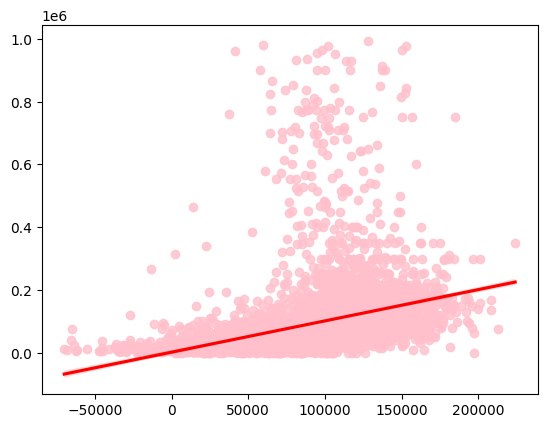

<Figure size 1000x800 with 0 Axes>

In [57]:
#create scatterplot with regression line
sns.regplot(data=clean_df, y=Y_test, x=Y_pred, scatter_kws={"color": "pink"}, line_kws={"color": "red"})

plt.figure(figsize=(10,8))
# plt.title('Yearly Compensation')
# plt.xlabel('', fontsize=10)
# plt.ylabel('', fontsize=10)
# plt.show()